In [1]:
import os
import glob
import numpy as np
from tensorflow.compat.v1.keras import layers
from tensorflow.compat.v1 import keras 
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
#explore initial data
data = np.load('data_single/apple.npy')

print(data[0])
print(data.shape)

In [2]:
def load_data(root, vfold_ratio=0.2, max_items_per_class= 4000 ):
    all_files = glob.glob(os.path.join(root, '*.npy'))

    #initialize variables 
    x = np.empty([0, 784])
    y = np.empty([0])
    class_names = []

    #load each data file 
    for idx, file in enumerate(all_files):
        data = np.load(file)
        #remove below if no max items limitation
        data = data[0: max_items_per_class, :]
        labels = np.full(data.shape[0], idx)

        x = np.concatenate((x, data), axis=0)
        y = np.append(y, labels)

        class_name, ext = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)
        
        print(labels)
        print(str(idx) +': ' + class_name + ' data has loaded')

    data = None
    labels = None
    
    #randomize the dataset 
    permutation = np.random.permutation(y.shape[0])
    x = x[permutation, :]
    y = y[permutation]

    #separate into training and testing 
    vfold_size = int(x.shape[0]/100*(vfold_ratio*100))

    x_test = x[0:vfold_size, :]
    y_test = y[0:vfold_size]
    x_train = x[vfold_size:x.shape[0], :]
    y_train = y[vfold_size:y.shape[0]]
    
    print(x_train)
    print(x_train.shape)
    print(y_train)
    print(y_train.shape)
    return x_train, y_train, x_test, y_test, class_names

In [ ]:
x_train, y_train, x_test, y_test, class_names = load_data('dataset')
num_classes = len(class_names)
image_size = 28

[0 0 0 ... 0 0 0]
0: lollipop data has loaded
[1 1 1 ... 1 1 1]
1: binoculars data has loaded
[2 2 2 ... 2 2 2]
2: garden data has loaded
[3 3 3 ... 3 3 3]
3: basket data has loaded
[4 4 4 ... 4 4 4]
4: penguin data has loaded
[5 5 5 ... 5 5 5]
5: washing machine data has loaded
[6 6 6 ... 6 6 6]
6: canoe data has loaded
[7 7 7 ... 7 7 7]
7: eyeglasses data has loaded
[8 8 8 ... 8 8 8]
8: screwdriver data has loaded
[9 9 9 ... 9 9 9]
9: mouse data has loaded
[10 10 10 ... 10 10 10]
10: apple data has loaded
[11 11 11 ... 11 11 11]
11: van data has loaded
[12 12 12 ... 12 12 12]
12: grapes data has loaded
[13 13 13 ... 13 13 13]
13: grass data has loaded
[14 14 14 ... 14 14 14]
14: watermelon data has loaded
[15 15 15 ... 15 15 15]
15: floor lamp data has loaded
[16 16 16 ... 16 16 16]
16: moon data has loaded
[17 17 17 ... 17 17 17]
17: zigzag data has loaded
[18 18 18 ... 18 18 18]
18: nail data has loaded
[19 19 19 ... 19 19 19]
19: leg data has loaded
[20 20 20 ... 20 20 20]
20: rol

[153 153 153 ... 153 153 153]
153: hot dog data has loaded
[154 154 154 ... 154 154 154]
154: see saw data has loaded
[155 155 155 ... 155 155 155]
155: rain data has loaded
[156 156 156 ... 156 156 156]
156: snail data has loaded
[157 157 157 ... 157 157 157]
157: sink data has loaded
[158 158 158 ... 158 158 158]
158: belt data has loaded
[159 159 159 ... 159 159 159]
159: speedboat data has loaded
[160 160 160 ... 160 160 160]
160: trombone data has loaded
[161 161 161 ... 161 161 161]
161: pants data has loaded
[162 162 162 ... 162 162 162]
162: crocodile data has loaded
[163 163 163 ... 163 163 163]
163: broccoli data has loaded
[164 164 164 ... 164 164 164]
164: hedgehog data has loaded
[165 165 165 ... 165 165 165]
165: rainbow data has loaded
[166 166 166 ... 166 166 166]
166: bulldozer data has loaded
[167 167 167 ... 167 167 167]
167: fork data has loaded
[168 168 168 ... 168 168 168]
168: sock data has loaded
[169 169 169 ... 169 169 169]
169: snake data has loaded
[170 170 

In [ ]:
#save the class names to csv
import csv
with open("classes.csv", "w") as csv_file:
    csv_writer = csv.writer(csv_file, delimiter=',')
    csv_writer.writerow(class_names)
    csv_file.close()

crocodile


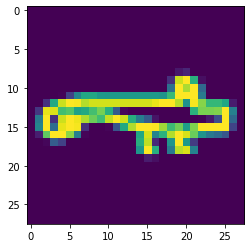

In [4]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_train))
plt.imshow(x_train[idx].reshape(28,28)) 
print(class_names[int(y_train[idx].item())])

In [5]:
# Reshape and normalize
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
# Define model (from Quickdraw)
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3),
                        padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(32, (5, 5), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (5, 5), padding='same', activation= 'relu'))

model.add(layers.MaxPooling2D(pool_size =(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(num_classes, activation='softmax')) 

# Train model
adam = tf.train.AdamOptimizer()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['top_k_categorical_accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 64)          51264     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)              

In [ ]:
# Define model (from sketcher)
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3),
                        padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax')) 
# Train model
adam = tf.train.AdamOptimizer()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['top_k_categorical_accuracy'])
print(model.summary())

In [13]:
model.fit(x = x_train, y = y_train, validation_split=0.1, batch_size = 256, verbose=2, epochs=10)

Train on 990720 samples, validate on 110080 samples
Epoch 1/10
990720/990720 - 378s - loss: 2.6454 - top_k_categorical_accuracy: 0.6887 - val_loss: 2.0606 - val_top_k_categorical_accuracy: 0.7864
Epoch 2/10
990720/990720 - 359s - loss: 2.6137 - top_k_categorical_accuracy: 0.6941 - val_loss: 2.0331 - val_top_k_categorical_accuracy: 0.7906
Epoch 3/10
990720/990720 - 369s - loss: 2.5914 - top_k_categorical_accuracy: 0.6976 - val_loss: 2.0146 - val_top_k_categorical_accuracy: 0.7922
Epoch 4/10
990720/990720 - 359s - loss: 2.5728 - top_k_categorical_accuracy: 0.7012 - val_loss: 2.0101 - val_top_k_categorical_accuracy: 0.7918
Epoch 5/10
990720/990720 - 370s - loss: 2.5555 - top_k_categorical_accuracy: 0.7037 - val_loss: 1.9832 - val_top_k_categorical_accuracy: 0.7942
Epoch 6/10
990720/990720 - 403s - loss: 2.5433 - top_k_categorical_accuracy: 0.7053 - val_loss: 1.9814 - val_top_k_categorical_accuracy: 0.7971
Epoch 7/10
990720/990720 - 399s - loss: 2.5309 - top_k_categorical_accuracy: 0.7073 

In [14]:
#evaluate on unseen data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

Test accuarcy: 80.13%


In [15]:
model.save('model_v3.h5')